# Experiments


In [1]:
%pwd

'd:\\Programming\\INTERNSHIPS\\SalesPrediction\\SalesPredictionProject\\notebook'

In [2]:
%cd ./..

d:\Programming\INTERNSHIPS\SalesPrediction\SalesPredictionProject


## importing Libraries


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"
sns.set_theme(style="darkgrid", font_scale=1.4)


## Importing Dataset


In [4]:
data = pd.read_csv("./artifacts/data_ingestion/raw/Train.csv")
data.head()


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

## Dataset Summary


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.describe()


Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

### Null & Duplicate values


In [7]:
print(f"Are there any Null Values? {data.isna().sum().any()}")
print(f"Are there any Duplicate Entries? {data.duplicated().any()}")


Are there any Null Values? True
Are there any Duplicate Entries? False


In [8]:
data.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data.isna().sum() / data.shape[0] * 100


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

**OBSERVATION**

- `Item_Outlet_Sales` is target or dependent feature.
- Dataset has **null values** in `Item_Weight` and `Outlet_Size` feature.
- Dataset has **no duplicate entries**


In [10]:
target = "Item_Outlet_Sales"


In [11]:
px.box(x=data[target])


## Dealing with Null values


In [12]:
df = data.copy()


In [13]:
df[["Item_Weight", "Outlet_Size"]].describe(include="all")


Item_Weight Outlet_Size
count   7060.000000        6113
unique          NaN           3
top             NaN      Medium
freq            NaN        2793
mean      12.857645         NaN
std        4.643456         NaN
min        4.555000         NaN
25%        8.773750         NaN
50%       12.600000         NaN
75%       16.850000         NaN
max       21.350000         NaN

In [14]:
from sklearn.impute import SimpleImputer

si_num = SimpleImputer(strategy="median")
si_cat = SimpleImputer(strategy="most_frequent")
df["Item_Weight"] = si_num.fit_transform(df[["Item_Weight"]])
df["Outlet_Size"] = si_cat.fit_transform(df[["Outlet_Size"]])


In [15]:
df.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Unique Values


In [16]:
for col in df.select_dtypes(include="O"):
    print(f"{col} ({df[col].nunique()}): {df[col].unique()}")
    print("".center(25, "-"))


Item_Identifier (1559): ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
-------------------------
Item_Fat_Content (5): ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
-------------------------
Item_Type (16): ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
-------------------------
Outlet_Identifier (10): ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
-------------------------
Outlet_Size (3): ['Medium' 'High' 'Small']
-------------------------
Outlet_Location_Type (3): ['Tier 1' 'Tier 3' 'Tier 2']
-------------------------
Outlet_Type (4): ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
-------------------------


**OBSERVATION**

- Here `Item_Fat_Content` has 2 categories but denoted with different notations

**TODO**

- Unify the categories name in `Item_Fat_Content`


In [17]:
mapper = {"Low Fat": "Low Fat", "low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular", "Regular": "Regular"}
df["Item_Fat_Content"] = df["Item_Fat_Content"].map(lambda x: mapper[x])
df["Item_Fat_Content"].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# EDA

## Data type based features


### Temporal Feature


In [18]:
temporal_feature = [feature for feature in data.columns if "year" in feature.lower()]
temporal_feature


['Outlet_Establishment_Year']

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

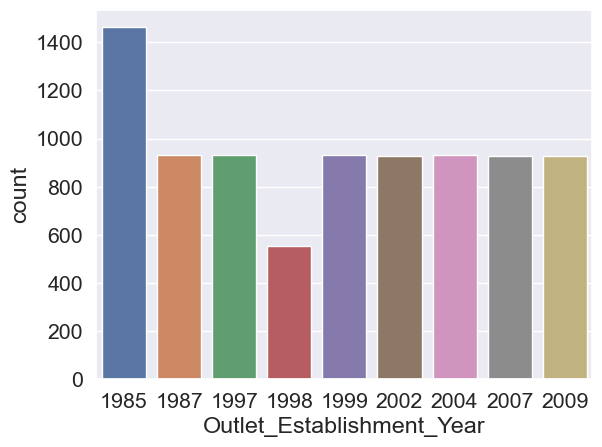

In [19]:
sns.countplot(df[temporal_feature], x=temporal_feature[0])


In [20]:
px.histogram(df[temporal_feature[0]].astype(str).sort_values()).update_layout(xaxis_title=temporal_feature[0],showlegend=False)


**OBSERVATION**
- Most outlet are established in 1985 and least in 1998.
- Other present years has Uniform distribution.

In [21]:
px.histogram(df[temporal_feature[0]], color=df[temporal_feature[0]]).update_layout(bargap=0.1)


### Numerical Features


In [22]:
numerical_features = [
    col for col in data.select_dtypes(exclude="O").columns.sort_values() if col not in temporal_feature
]
numerical_features


['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight']

In [23]:
discrete_feature = [feature for feature in data[numerical_features].columns if data[feature].nunique() < 30]
discrete_feature


[]

In [24]:
continuous_feature = [feature for feature in data[numerical_features].columns if feature not in discrete_feature]
continuous_feature


['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight']

In [25]:
for feature in continuous_feature:
    px.histogram(data[feature], marginal="rug",).update_traces(
        marker_line_width=0.5, marker_line_color="white", showlegend=False
    ).update_layout(xaxis_title=feature, yaxis_title="Count").show()


**OBSERVATION**

- `Item_MRP` is showing growing and decreasing distribution.
- `Item_Outlet_Sales` and `Item_Visibility` is right skewed.
- `Item_Visibility` has more products with `0` view this indicates most of the products are not interested or are not located in visible sight.
- `Item_Weight` is fairly distributed.


### Outliers


In [26]:
for feature in numerical_features:
    px.box(x=df[feature]).update_layout(xaxis_title=feature).show()


**OBSERVATION**

- `Item_Outlet_Sales` has outlier but from graphs it seems evident that it's due to `visibility` and `MRP`.
- Capping outlier or removing outlier would negatively affect the model.


In [27]:
def detect_outliers_iqr(data: pd.Series, show=True) -> tuple or None:
    """Detect outlier from `pd.Series`

    Args:
        data (pd.Series): Data points to detect outliers from
        show (bool, optional): Flag to print or return result. Defaults to True (print result and no return).

    Returns:
        tuple or None: Print the result or return result.
    """
    outliers = []
    q1, q3 = data.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    sample_outliers, n_outlier, p_outlier = sorted(outliers), len(outliers), len(outliers) / data.shape[0] * 100
    if show:
        print(f"Outliers from IQR method: {sample_outliers}\nn outlier: {n_outlier}\n% outlier: {p_outlier:.3f}")
        return
    return sample_outliers, n_outlier, p_outlier


for feature in numerical_features:
    print(feature.center(50, "="))
    detect_outliers_iqr(df[feature])


=====================Item_MRP=====================
Outliers from IQR method: []
n outlier: 0
% outlier: 0.000
================Item_Outlet_Sales=================
Outliers from IQR method: [6503.5344, 6507.5292, 6515.5188, 6524.84, 6528.169, 6543.4824, 6574.775, 6574.775, 6579.4356, 6595.4148, 6608.065, 6611.394, 6615.3888, 6615.3888, 6622.7126, 6624.71, 6630.0364, 6636.6944, 6636.6944, 6641.355, 6668.6528, 6669.3186, 6687.961, 6692.6216, 6704.606, 6704.606, 6705.2718, 6723.2484, 6723.2484, 6729.9064, 6729.9064, 6751.212, 6757.87, 6759.2016, 6767.1912, 6768.5228, 6769.8544, 6771.186, 6775.1808, 6795.1548, 6795.1548, 6796.4864, 6817.792, 6831.108, 6849.0846, 6851.082, 6852.4136, 6855.0768, 6867.0612, 6872.3876, 6881.043, 6893.0274, 6897.688, 6897.688, 6911.004, 6930.978, 6942.9624, 6964.9338, 6970.926, 6972.2576, 6976.2524, 7017.532, 7017.532, 7028.1848, 7028.8506, 7033.5112, 7033.5112, 7064.8038, 7073.4592, 7084.112, 7086.1094, 7094.7648, 7100.757, 7105.4176, 7116.0704, 7130.718, 7136.71

### Categorical Features


In [28]:
categorical_features = data.select_dtypes(include="O").columns
categorical_features


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [29]:
df[categorical_features].head()


Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 1  Supermarket Type1  
1      Medium               Tier 3  Supermarket Type2  
2      Medium               Tier 1  Supermarket Type1  
3      Medium               Tier 3      Grocery Store  
4        High               Tier 3  Supermarket Type1

In [30]:
for feature in categorical_features:
    print(f"The feature name is {feature} and the number of categories are {df[feature].nunique()}")


The feature name is Item_Identifier and the number of categories are 1559
The feature name is Item_Fat_Content and the number of categories are 2
The feature name is Item_Type and the number of categories are 16
The feature name is Outlet_Identifier and the number of categories are 10
The feature name is Outlet_Size and the number of categories are 3
The feature name is Outlet_Location_Type and the number of categories are 3
The feature name is Outlet_Type and the number of categories are 4


In [31]:
for feature in categorical_features[1:]:
    px.histogram(df, x=feature, color=feature).update_layout(showlegend=False).show()


**OBSERVATION**

- `Low Fat` is twice than `Regular` in `Item_Fat_Content`
- `Fruits and Vegetables` and `Snack Foods` are popular `Item-Type`
- `Outlet_Identifier` is Uniform around 930 except `OUT010` and `OUT019` around 550
- `Medium` is dominating with 5000+ and `High` is close to 1000 in `Outlet_Size` and `Small` is close to 2400
- `Outlet_Location_Type` are not that far apart where count is `Tier 3 > Tier 2 > Tier 1`
- `Supermarket Type1` is 5x time more compare to other `Outlet_Type` which are around 1000


In [32]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [33]:
px.histogram(df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().reset_index().sample(frac=0.3),x='Item_Identifier',y='Item_Outlet_Sales')

In [34]:
px.scatter(data_frame=df,x='Item_Identifier',y="Item_Outlet_Sales",opacity=0.2)

**OBSERVATION**
- Some Outlet has higher sales > 10k
- Most Outlet has sales <2k
- Average Sales is between 2k and 4k

### Correlation plot


<AxesSubplot: title={'center': 'Correlation Plot'}>

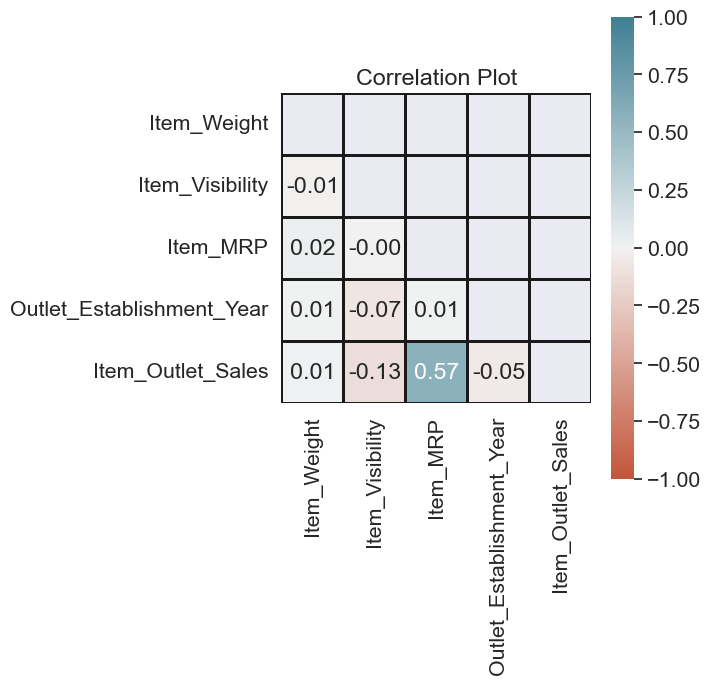

In [35]:
def plot_corr(
    corr_data: pd.DataFrame, fig_size: tuple = (5, 6), fig_cmap=sns.diverging_palette(20, 220, as_cmap=True)
) -> plt.Axes:
    """Return Correlation plot

    Args:
        corr_data (pd.DataFrame): Correlation DataFrame
        fig_size (tuple, optional): Figure Size of the graph. Defaults to (5,6).
        fig_cmap (matplotlib colormap name or object, or list of colors, optional): Colormap. Defaults to sns.diverging_palette(20, 220, as_cmap=True).

    Returns:
        plt.Axes: Correlation Plot
    """
    plt.figure(figsize=(fig_size))
    mask = np.triu(np.ones_like(corr_data))
    ax = sns.heatmap(
        corr_data,
        mask=mask,
        fmt=".2f",
        annot=True,
        linewidths=0.25,
        vmin=-1,
        vmax=1,
        cmap=fig_cmap,
        square=True,
        # cmap="PuOr",
        center=0,
        lw=1,
        linecolor="k",
    )
    ax.set_title("Correlation Plot")
    return ax


plot_corr(df.corr(numeric_only=True))


**OBSERVATION**

- Feature are not correlated with each other and target.
- `Item_MRP` is having maximum correlation with `Item_Outlet_Sales` standing at 0.57.

# Preprocessing

In [36]:
df.describe(include='O')

Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                2                     16   
top              FDW13          Low Fat  Fruits and Vegetables   
freq                10             5517                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        8523                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        5203                 3350               5577

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [38]:
df[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
'Item_Type', 'Item_MRP', 'Outlet_Identifier',
'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
'Outlet_Type', 'Item_Outlet_Sales']]
ct=ColumnTransformer(transformers=[('ordinal',OrdinalEncoder(),[0]),('ohe',OneHotEncoder(drop='first',sparse=False),[2,4,6,8,9,10])],remainder='passthrough')


In [39]:
res=ct.fit_transform(df)
res

array([[1.5600000e+02, 0.0000000e+00, 0.0000000e+00, ..., 2.4980920e+02,
        1.9990000e+03, 3.7351380e+03],
       [8.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 4.8269200e+01,
        2.0090000e+03, 4.4342280e+02],
       [6.6200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.4161800e+02,
        1.9990000e+03, 2.0972700e+03],
       ...,
       [1.3570000e+03, 0.0000000e+00, 0.0000000e+00, ..., 8.5122400e+01,
        2.0040000e+03, 1.1931136e+03],
       [6.8100000e+02, 1.0000000e+00, 0.0000000e+00, ..., 1.0313320e+02,
        2.0090000e+03, 1.8455976e+03],
       [5.0000000e+01, 0.0000000e+00, 0.0000000e+00, ..., 7.5467000e+01,
        1.9970000e+03, 7.6567000e+02]])

In [40]:
df.head(1)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1           3735.138

In [41]:
ct.named_transformers_['ohe'].inverse_transform([res[0,1:33]])

array([['Low Fat', 'Dairy', 'OUT049', 'Medium', 'Tier 1',
        'Supermarket Type1']], dtype=object)

## Preparing Dataset

In [42]:
ct=ColumnTransformer(transformers=[('ordinal',OrdinalEncoder(),[0]),('ohe',OneHotEncoder(drop='first',sparse=False),[2,4,6,8,9,10])],remainder='passthrough')


In [43]:
X_raw_train=df.drop('Item_Outlet_Sales',axis=1)
y_train=df['Item_Outlet_Sales']
X_train=ct.fit_transform(X_raw_train)

In [44]:
transform_x=X_train[0]
transform_x

array([1.5600000e+02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 9.3000000e+00, 1.6047301e-02, 2.4980920e+02,
       1.9990000e+03])

In [45]:
X_raw_train.iloc[[0]]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1

In [46]:
ct.named_transformers_['ordinal'].inverse_transform([[transform_x[0]]])

array([['FDA15']], dtype=object)

In [47]:
ct.named_transformers_['ohe'].inverse_transform([transform_x[1:33]])

array([['Low Fat', 'Dairy', 'OUT049', 'Medium', 'Tier 1',
        'Supermarket Type1']], dtype=object)

In [48]:
transform_x[33:]

array([9.3000000e+00, 1.6047301e-02, 2.4980920e+02, 1.9990000e+03])

## Model Trainer

In [49]:
from sklearn.linear_model import (
    LinearRegression,
    ElasticNet,
    Ridge,
    Lasso,
)  # // can use CV of regularization model but not using due to GridSearchCV approach
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [50]:
class ModelEvaluate:
    __model_names = []
    __model_report = []

    def __init__(self, model_obj, model_name: str):
        self.__unique_model_name(model_name)
        self.model_obj = model_obj
        self.model_name = model_name
        self.gscv = None
        self.pipe = None
        self.scaler = StandardScaler()

    def initialize_gscv(
        self, params: dict, *, scoring: str = "r2", cv: int = 5
    ):  # using r2 as it's easy to compare between different models
        """Initialize Grid Search CV Object

        Args:
            params (dict): parameter of model object for hyperparameter tuning
            scoring (str, optional): Scoring string. Defaults to "r2".
            cv (int, optional): No. of iteration in cross validation. Defaults to 5.
        """
        self.gscv = GridSearchCV(
            self.model_obj, param_grid=params, scoring=scoring, cv=cv, refit=False, verbose=1
        )  # refit=False means it will not fit the model with best perimeter,
        # i.e. we cannot use score or predict method, it's advisable to use it only when you want to calculate score

    def initialize_pipeline(self):
        """Initialize Pipeline with preprocessor obj and gscv obj"""
        self.pipe = Pipeline(steps=[("std_scaler", self.scaler), ("gscv", self.gscv)])

    def fit_pipeline(self, X: pd.DataFrame, y: pd.Series) -> dict:
        """Train the pipeline on `X` and `y`

        Args:
            X (pd.DataFrame): Features
            y (pd.Series): Target

        Returns:
            dict: Returns best score and best parameter
        """
        self.pipe.fit(X, y)
        self.__model_report.append(
            {"Model Name": self.model_name, "Best Score (R2)": self.pipe.named_steps["gscv"].best_score_}
        )
        return self.get_best()

    def get_best(self) -> dict:
        """Returns best score and best parameter

        Returns:
            dict: best score and best parameter
        """
        return {"score": self.pipe.named_steps["gscv"].best_score_, "param": self.pipe.named_steps["gscv"].best_params_}

    def __unique_model_name(self, model_name: str):
        if model_name in self.__model_names:
            self.__model_report=[report for report in self.__model_report if report['Model Name']!=model_name]
            # raise Exception(f"{model_name} already exists. model_name should be unique.")
            print("".center(50,'x'))
            print(model_name,'removed from model report')
            print("".center(50,'x'))
        self.__model_names.append(model_name)

    @staticmethod
    def get_model_names() -> list:
        """Return list of existing model names

        Returns:
            list: model names
        """
        return ModelEvaluate.__model_names

    @staticmethod
    def get_model_report() -> pd.DataFrame or str:
        """Returns model report with Model Name and Best Score

        Returns:
            pd.DataFrame or str: Model report
        """
        if ModelEvaluate.__model_report:
            return pd.DataFrame(ModelEvaluate.__model_report)
        return "No Model Evaluated"


In [51]:
# linear regression
linear_param = {}
linear_regressor = ModelEvaluate(LinearRegression(), "linear regression")
linear_regressor.initialize_gscv(linear_param)
linear_regressor.initialize_pipeline()
linear_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'score': 0.5586603764401096, 'param': {}}

In [52]:
# lasso
lasso_param = {
    "alpha": [ 0.1, 0.5, 1, 1.5, 2,3],
    'tol':[0.0001,0.001]
}
lasso_regressor = ModelEvaluate(Lasso(), "lasso regression")
lasso_regressor.initialize_gscv(lasso_param)
lasso_regressor.initialize_pipeline()
lasso_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


d:\Programming\INTERNSHIPS\SalesPrediction\SalesPredictionProject\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.217e+08, tolerance: 1.955e+06

d:\Programming\INTERNSHIPS\SalesPrediction\SalesPredictionProject\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.428e+08, tolerance: 2.002e+06

d:\Programming\INTERNSHIPS\SalesPrediction\SalesPredictionProject\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

{'score': 0.5594817775507854, 'param': {'alpha': 3, 'tol': 0.001}}

In [53]:
# ridge
ridge_param = {"alpha": np.arange(0.1, 50, 3.5), 'max_iter':[1000,1800]}
ridge_regressor = ModelEvaluate(Ridge(), "ridge regression")
ridge_regressor.initialize_gscv(ridge_param)
ridge_regressor.initialize_pipeline()
ridge_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'score': 0.5588124074805535, 'param': {'alpha': 24.6, 'max_iter': 1000}}

In [54]:
# elasticNet
elasticNet_param = {
    "alpha": [*lasso_param["alpha"], *ridge_param["alpha"]],
    "l1_ratio": np.arange(0.3, 1, 0.1),
    "random_state": [48, 64],
}
elasticNet_regressor = ModelEvaluate(ElasticNet(), "elasticNet regression")
elasticNet_regressor.initialize_gscv(elasticNet_param)
elasticNet_regressor.initialize_pipeline()
elasticNet_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 294 candidates, totalling 1470 fits


{'score': 0.5587749581320279,
 'param': {'alpha': 0.1, 'l1_ratio': 0.9000000000000001, 'random_state': 48}}

In [55]:
# decision tree
decision_tree_param = {
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_depth": [None, 2, 4],
    "min_samples_leaf": [3, 5, 10],
    "max_features": ["log2", "sqrt"],
}
decision_tree_regressor = ModelEvaluate(DecisionTreeRegressor(), "decision tree regression")
decision_tree_regressor.initialize_gscv(decision_tree_param)
decision_tree_regressor.initialize_pipeline()
decision_tree_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'score': 0.48943206796322414,
 'param': {'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 10}}

In [56]:
# random forest
random_forest_param = {
    "n_estimators": np.arange(50, 201, 50),
    "criterion": ["squared_error"],
    "max_depth": [None, 2, 5],
    "min_samples_leaf": [3, 8],
    "max_features": ["log2", "sqrt"],
}
random_forest_regressor = ModelEvaluate(RandomForestRegressor(), "random forest regression")
random_forest_regressor.initialize_gscv(random_forest_param)
random_forest_regressor.initialize_pipeline()
random_forest_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'score': 0.5767347189523109,
 'param': {'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'n_estimators': 200}}

In [57]:
# adaboost
ada_boost_param = {
    "n_estimators": np.arange(50, 201, 50),
    "learning_rate": [0.1, 0.5],
    "loss": ["linear", "square", "exponential"],
}
ada_boost_regressor = ModelEvaluate(AdaBoostRegressor(), "ada boost regression")
ada_boost_regressor.initialize_gscv(ada_boost_param)
ada_boost_regressor.initialize_pipeline()
ada_boost_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'score': 0.49161100765248983,
 'param': {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}}

In [58]:
# xgboost
xg_boost_param = {
    "n_estimators": np.arange(50, 201, 50),
    "max_depth": [2, 5,8],
    "learning_rate": [0.1, 0.5, 1],
}
xg_boost_regressor = ModelEvaluate(XGBRegressor(), "xg boost regression")
xg_boost_regressor.initialize_gscv(xg_boost_param)
xg_boost_regressor.initialize_pipeline()
xg_boost_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'score': 0.585480232615861,
 'param': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}}

In [59]:
ModelEvaluate.get_model_report().sort_values('Best Score (R2)',ascending=False)

Model Name  Best Score (R2)
7       xg boost regression         0.585480
5  random forest regression         0.576735
1          lasso regression         0.559482
2          ridge regression         0.558812
3     elasticNet regression         0.558775
0         linear regression         0.558660
6      ada boost regression         0.491611
4  decision tree regression         0.489432

In [60]:
xg_boost_regressor.get_best()

{'score': 0.585480232615861,
 'param': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}}

In [61]:
regressor=XGBRegressor(**xg_boost_regressor.get_best()['param'])
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
regressor.score(X_train,y_train)

0.6568504225937875

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [64]:
y_pred=regressor.predict(X_train)

In [65]:
mean_squared_error(y_train,y_pred,squared=False)

999.5912589420541

In [66]:
mean_absolute_error(y_train,y_pred)

707.9079311902891

**CONCLUSION**
- XGBoost Regressor performed well compare to other regressors

In [67]:
import numpy as np
import pandas as pd
import pickle


In [68]:
df=pd.read_csv("./artifacts/data_ingestion/raw/Train.csv")
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [69]:
data_arr=np.load('./artifacts/data_preprocessing/Train_preprocessed.npy')
data_arr

array([[-8.41871687e-01, -9.70732174e-01,  1.74745381e+00, ...,
         0.00000000e+00,  0.00000000e+00,  3.73513800e+03],
       [-1.64170589e+00, -9.08111226e-01, -1.48902325e+00, ...,
         1.00000000e+00,  0.00000000e+00,  4.43422800e+02],
       [ 1.09855449e+00, -9.56917331e-01,  1.00402093e-02, ...,
         0.00000000e+00,  0.00000000e+00,  2.09727000e+03],
       ...,
       [-5.34243147e-01, -5.99784486e-01, -8.97207551e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.19311360e+03],
       [-1.33644372e+00,  1.53287976e+00, -6.07976921e-01, ...,
         1.00000000e+00,  0.00000000e+00,  1.84559760e+03],
       [ 4.59633674e-01, -4.11935907e-01, -1.05226104e+00, ...,
         0.00000000e+00,  0.00000000e+00,  7.65670000e+02]])

In [70]:
data_arr[0]

array([-8.41871687e-01, -9.70732174e-01,  1.74745381e+00,  1.39540761e-01,
        1.56000000e+02,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.73513800e+03])

In [72]:
ct=pickle.load(open('./artifacts/data_preprocessing/preprocessed.pkl','rb'))
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 [1, 3, 5, 7]),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 [0]),
                                ('ohe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 [2, 4, 6, 8, 9, 10])])

In [80]:
ct.named_transformers_['numerical'].named_steps

{'imputer': SimpleImputer(), 'scaler': StandardScaler()}

In [82]:
df.iloc[0]

Item_Identifier                          FDA15
Item_Weight                                9.3
Item_Fat_Content                       Low Fat
Item_Visibility                       0.016047
Item_Type                                Dairy
Item_MRP                              249.8092
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 1999
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                     3735.138
Name: 0, dtype: object

In [81]:
ct.named_transformers_['numerical'].named_steps.scaler.inverse_transform([data_arr[0,:4]])

array([[9.3000000e+00, 1.6047301e-02, 2.4980920e+02, 1.9990000e+03]])

In [92]:
ct.named_transformers_['ordinal'].named_steps.ordinal.inverse_transform([[data_arr[0,4]]])

array([['FDA15']], dtype=object)

In [94]:
ct.named_transformers_['ohe'].named_steps.ohe.inverse_transform([data_arr[0,5:-1]])

array([['Low Fat', 'Dairy', 'OUT049', 'Medium', 'Tier 1',
        'Supermarket Type1']], dtype=object)